In [81]:
%matplotlib inline

from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [82]:
dta = [90,82,100,113,155,186,86,81,180,92,93,131,189,155,127,
                    161,122,180,212,237,200,194, 129, 139,179,212,204,143,
                    131,113,190,221,138,216,174,191,208,222,167,123,132,
                    227, 226, 135, 190, 107, 180, 295,282,161,238,187,250,
                    230,170,197,218,168,211,146,150,210,312,125,219,173,
                    242,202,193,220,246,120]
dta=np.array(dta,dtype=np.float)

In [83]:
dta=pd.Series(dta)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1901','1972'))

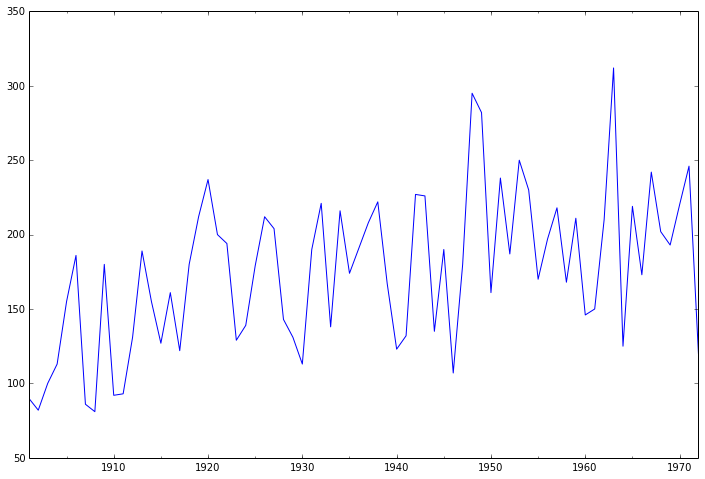

In [84]:
dta.plot(figsize=(12,8));

ARIMA 模型对时间序列的要求是平稳型。因此，当你得到一个非平稳的时间序列时，首先要做的即是做时间序列的差分，直到得到一个平稳时间序列。如果你对时间序列做d次差分才能得到一个平稳序列，那么可以使用ARIMA(p,d,q)模型，其中d是差分次数。

（一个时间序列，如果均值没有系统的变化（无趋势）、方差没有系统变化，且严格消除了周期性变化，就称之是平稳的）

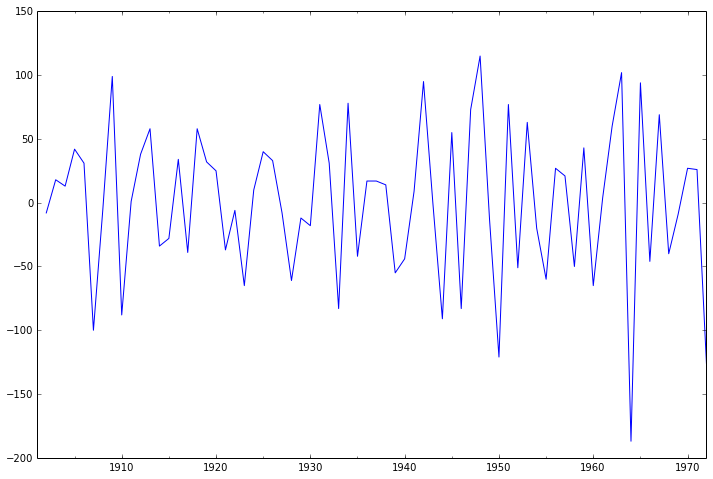

In [85]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)

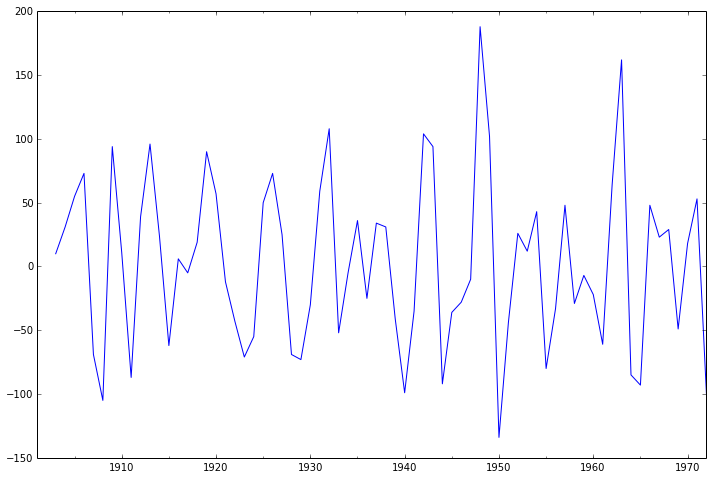

In [86]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff2 = dta.diff(2)
diff2.plot(ax=ax1)

已经平稳，二阶效果也差不多

第一步我们要先检查平稳时间序列的自相关图和偏自相关图

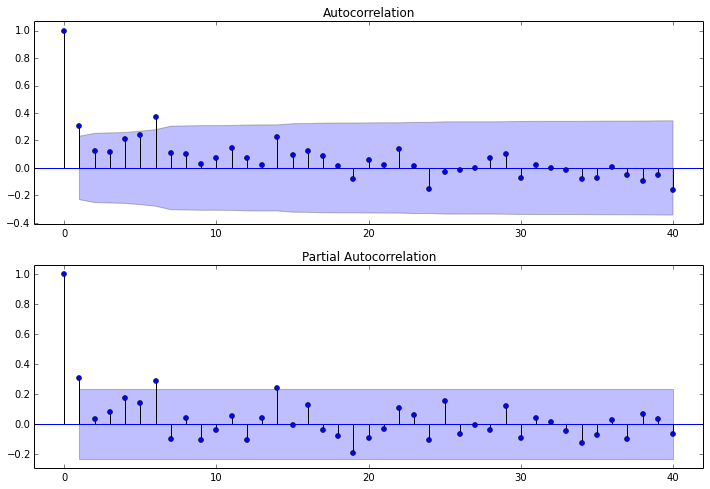

In [137]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)

其中lags 表示滞后的阶数，以上分别得到acf 图和pacf 图 （PACF是判定AR模型阶数的，也就是p。ACF是判断MA阶数的）

通过两图观察得到： 
* 自相关图显示滞后有两个阶超出了置信边界； 
* 偏相关图显示在滞后1至6阶（lags 1,2,…，6）时的偏自相关系数超出了置信边界，从lag 6之后偏自相关系数值缩小至0 

| 模型        | 自相关系数 | 偏自相关系数 |
| --------- | ----- | ------ |
| AR(p)     | 拖尾    | p阶截尾   |
| MA(q)     | q阶截尾  | 拖尾     |
| ARMA(p,q) | 拖尾    | 拖尾     |

* ARMA(0,1)
* ARMA(0,5)
* ARMA(6,0)
* ARMA(6,1)
* ARMA(6,5)

In [140]:
arma_mod_01 = a = sm.tsa.ARMA(dta,(0,1)).fit()
print(a.aic,a.bic,a.hqic)
arima_mod_01 = a = sm.tsa.ARIMA(dta,(0,1,1)).fit()
print(a.aic,a.bic,a.hqic)
arima_mod_60 = a = sm.tsa.ARIMA(dta,(6,1,0)).fit()
print(a.aic,a.bic,a.hqic)
arima_mod_61 = a = sm.tsa.ARIMA(dta,(6,1,1)).fit()
print(a.aic,a.bic,a.hqic)

771.84142472 778.671423077 774.560467292
752.647021716 759.435061347 755.346409966
758.050248461 776.151687478 765.248617127
756.67859372 777.042712614 764.776758469


可以看到ARMA(0,1)的aic，bic，hqic均最小，因此是最佳模型。

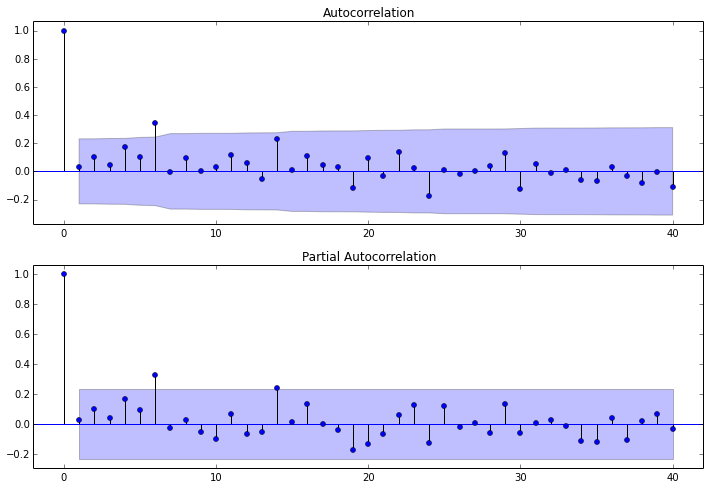

In [141]:
resid = arma_mod_01.resid

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)
plt.show()

In [142]:
print(sm.stats.durbin_watson(arma_mod_01.resid.values))

1.87104188938


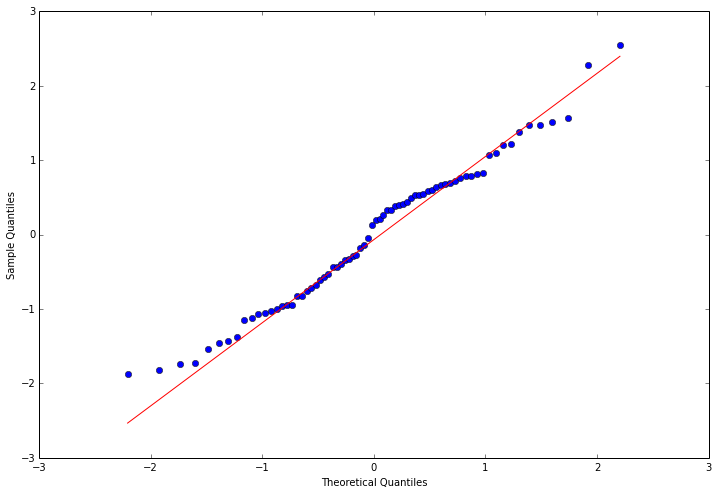

In [143]:
resid = arma_mod_01.resid#残差
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)
plt.show()

In [144]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0   0.029200   0.063984  0.800306
2.0   0.102267   0.860031  0.650499
3.0   0.042286   0.998107  0.801710
4.0   0.176624   3.442420  0.486687
5.0   0.103858   4.300190  0.507054
6.0   0.344845  13.900098  0.030772
7.0  -0.004759  13.901954  0.052953
8.0   0.098425  14.708436  0.065069
9.0   0.002740  14.709071  0.099244
10.0  0.030847  14.790839  0.139876
11.0  0.117208  15.990754  0.141474
12.0  0.062427  16.336815  0.176292
13.0 -0.051464  16.575996  0.219419
14.0  0.233389  21.579783  0.087671
15.0  0.007867  21.585569  0.119140
16.0  0.109308  22.722356  0.121361
17.0  0.046231  22.929403  0.151563
18.0  0.031207  23.025495  0.189612
19.0 -0.115997  24.378130  0.182045
20.0  0.092869  25.261824  0.191597
21.0 -0.035111  25.390613  0.230643
22.0  0.135642  27.351194  0.198190
23.0  0.027028  27.430623  0.238081
24.0 -0.177977  30.946634  0.155327
25.0  0.010229  30.958494  0.190397
26.0 -0.015815  30.987463  0

1970-12-31    179.484000
1971-12-31    174.857178
1972-12-31    174.857178
1973-12-31    174.857178
1974-12-31    174.857178
1975-12-31    174.857178
1976-12-31    174.857178
1977-12-31    174.857178
1978-12-31    174.857178
1979-12-31    174.857178
1980-12-31    174.857178
1981-12-31    174.857178
1982-12-31    174.857178
1983-12-31    174.857178
1984-12-31    174.857178
1985-12-31    174.857178
1986-12-31    174.857178
1987-12-31    174.857178
1988-12-31    174.857178
1989-12-31    174.857178
1990-12-31    174.857178
1991-12-31    174.857178
1992-12-31    174.857178
1993-12-31    174.857178
1994-12-31    174.857178
1995-12-31    174.857178
1996-12-31    174.857178
1997-12-31    174.857178
1998-12-31    174.857178
1999-12-31    174.857178
2000-12-31    174.857178
Freq: A-DEC, dtype: float64


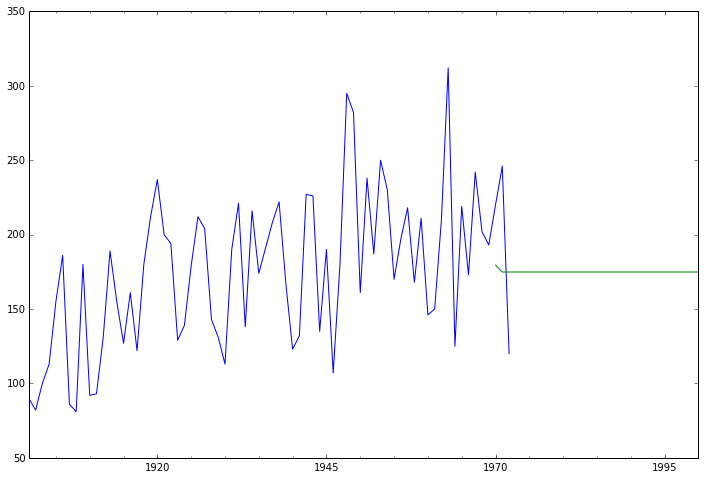

In [145]:
predict_sunspots = arma_mod_01.predict('1970', '2000', dynamic=True)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['1901':].plot(ax=ax)
predict_sunspots.plot(ax=ax)
plt.show()